In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Reading the data

In [2]:
churnData = pd.read_csv('data/DATA_Customer-Churn.csv')

## Data Cleaning

### Data Types Check

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churnData['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace(' ', 0)

In [7]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])

In [8]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace(0, churnData['TotalCharges'].mean())

In [9]:
# Column 'SeniorCitizen' later need for model, so 1 and 0 as values are fine
#churnData['SeniorCitizen'] = churnData['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [10]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### Null Values Check

In [11]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
churnData_obj = churnData.select_dtypes(object)

In [13]:
churnData_obj.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'Churn'],
      dtype='object')

In [14]:
for i in churnData_obj.columns:
    print()
    print(f"{churnData_obj[i].value_counts()}")


Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1695
One year     

In [15]:
churnData_num = churnData.select_dtypes(np.number)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

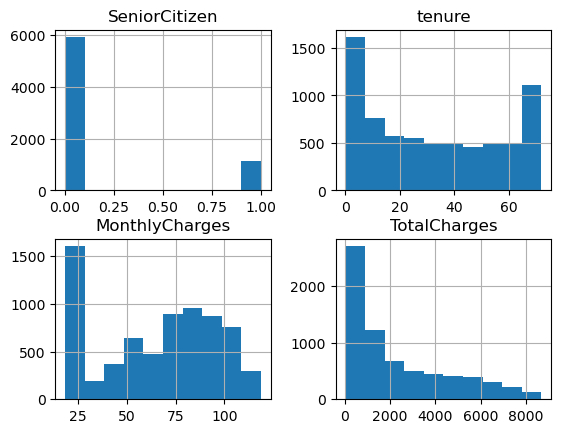

In [16]:
churnData_num.hist()

<Axes: >

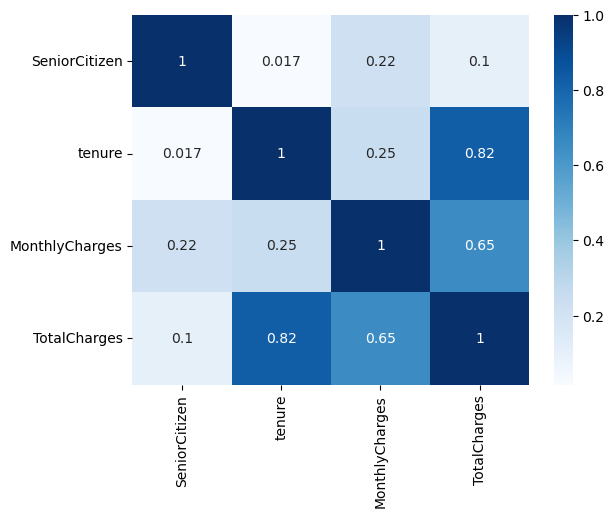

In [17]:
corr = churnData_num.corr()
# plot the heatmap
sns.heatmap(corr, cmap='Blues', annot=True)

## Modeling

### Train Test Split

In [18]:
churnData['Churn'] = churnData['Churn'].replace({'No':0, 'Yes':1})

In [19]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

### Transform Columns

In [20]:
pt = PowerTransformer()
pt.fit(X_train)
X_train_log = pt.transform(X_train)
X_test_log = pt.transform(X_test)

### Logistic Regression 

In [21]:
log_model = LogisticRegression() 

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.788782,0.801278
1,Precision,0.652482,0.699187
2,Recall,0.431925,0.455026


### Confusion Matrix

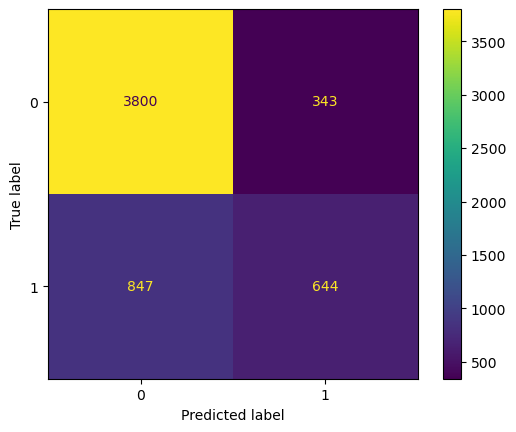

In [22]:
cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

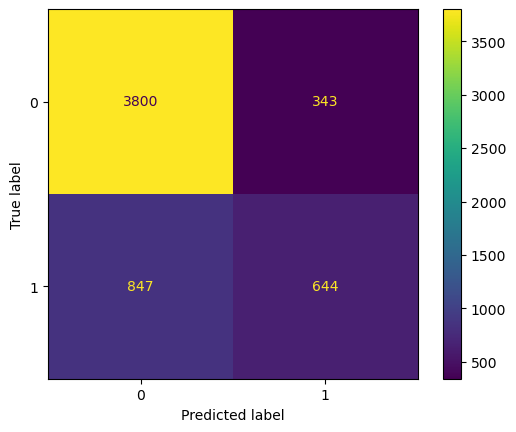

In [23]:
cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

### KNN Classification

In [24]:
model = KNeighborsClassifier(n_neighbors=20,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.799077,0.785664
1,Precision,0.737120,0.704301
2,Recall,0.374245,0.346561


### Confusion Matrix

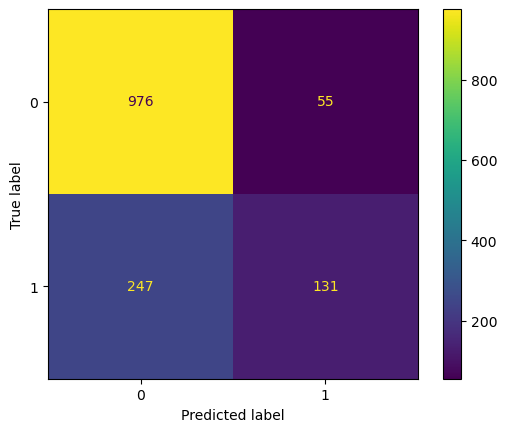

In [25]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [26]:
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k,weights='uniform') # declare we're using knn classification model
    model.fit(X_train, y_train) # train model
    y_pred = model.predict(X_test) # predict test
    y_pred_train=model.predict(X_train) # predict train (for sanity checks)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train),
                                             precision_score(y_train, y_pred_train),
                                             recall_score(y_train, y_pred_train)],
                                   'Test': [accuracy_score(y_test, y_pred),
                                            precision_score(y_test, y_pred),
                                            recall_score(y_test, y_pred)]})
    print(f"Perfomance for K = {k}")
    display(performance_log)

Perfomance for K = 1


,Error_metric,Train,Test
0,Accuracy,0.988463,0.713982
1,Precision,0.979167,0.465753
2,Recall,0.977197,0.449735


Perfomance for K = 2


,Error_metric,Train,Test
0,Accuracy,0.856408,0.754436
1,Precision,0.998538,0.606667
2,Recall,0.458082,0.240741


Perfomance for K = 3


,Error_metric,Train,Test
0,Accuracy,0.861022,0.738822
1,Precision,0.782297,0.517007
2,Recall,0.657948,0.402116


Perfomance for K = 4


,Error_metric,Train,Test
0,Accuracy,0.834753,0.764372
1,Precision,0.850877,0.626374
2,Recall,0.455399,0.301587


Perfomance for K = 5


,Error_metric,Train,Test
0,Accuracy,0.834398,0.771469
1,Precision,0.744737,0.605263
2,Recall,0.569416,0.425926


Perfomance for K = 6


,Error_metric,Train,Test
0,Accuracy,0.823039,0.775018
1,Precision,0.802696,0.659686
2,Recall,0.439302,0.333333


Perfomance for K = 7


,Error_metric,Train,Test
0,Accuracy,0.819844,0.776437
1,Precision,0.728846,0.628571
2,Recall,0.508384,0.407407


Perfomance for K = 8


,Error_metric,Train,Test
0,Accuracy,0.813809,0.783534
1,Precision,0.764354,0.693122
2,Recall,0.428571,0.346561


Perfomance for K = 9


,Error_metric,Train,Test
0,Accuracy,0.815939,0.783534
1,Precision,0.722986,0.656652
2,Recall,0.493628,0.404762


Perfomance for K = 10


,Error_metric,Train,Test
0,Accuracy,0.810792,0.782825
1,Precision,0.763321,0.697802
2,Recall,0.413146,0.335979


Perfomance for K = 11


,Error_metric,Train,Test
0,Accuracy,0.809549,0.781405
1,Precision,0.715909,0.654867
2,Recall,0.464789,0.391534


Perfomance for K = 12


,Error_metric,Train,Test
0,Accuracy,0.808484,0.784244
1,Precision,0.758145,0.694737
2,Recall,0.405768,0.349206


Perfomance for K = 13


,Error_metric,Train,Test
0,Accuracy,0.809194,0.784244
1,Precision,0.731111,0.672897
2,Recall,0.441315,0.380952


Perfomance for K = 14


,Error_metric,Train,Test
0,Accuracy,0.803337,0.786373
1,Precision,0.743949,0.708108
2,Recall,0.391683,0.346561


Perfomance for K = 15


,Error_metric,Train,Test
0,Accuracy,0.804047,0.787083
1,Precision,0.714761,0.682243
2,Recall,0.431925,0.386243


Perfomance for K = 16


,Error_metric,Train,Test
0,Accuracy,0.802449,0.783534
1,Precision,0.746094,0.695187
2,Recall,0.384306,0.343915


Perfomance for K = 17


,Error_metric,Train,Test
0,Accuracy,0.805467,0.784954
1,Precision,0.719689,0.672811
2,Recall,0.433937,0.386243


Perfomance for K = 18


,Error_metric,Train,Test
0,Accuracy,0.802272,0.785664
1,Precision,0.740741,0.695876
2,Recall,0.389001,0.357143


Perfomance for K = 19


,Error_metric,Train,Test
0,Accuracy,0.802627,0.787793
1,Precision,0.716571,0.682028
2,Recall,0.420523,0.391534


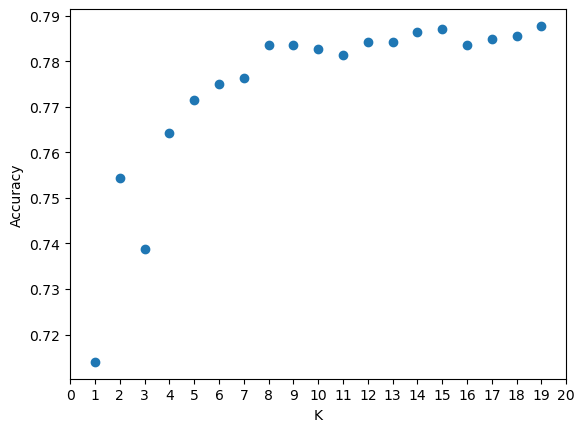

In [27]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);

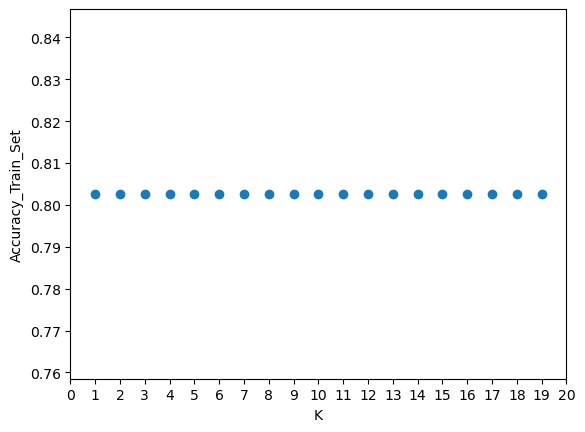

In [28]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(accuracy_score(y_train, y_pred_train))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy_Train_Set')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);

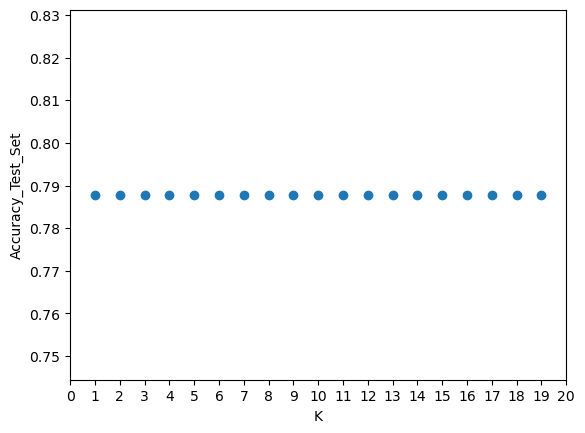

In [29]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, y_pred))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy_Test_Set')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);

### Upsampling using SMOTE

<BarContainer object of 2 artists>

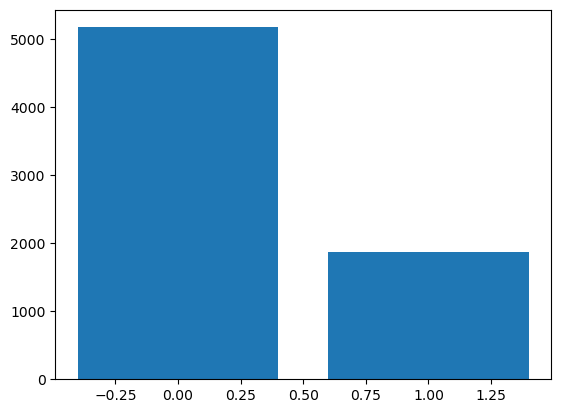

In [44]:
plt.bar(list(churnData['Churn'].value_counts().index), list(churnData['Churn'].value_counts()))

In [45]:
churnData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [48]:
y_train.value_counts()

0    4143
1    1491
Name: Churn, dtype: int64

In [49]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    4143
1    4143
Name: Churn, dtype: int64

## Logistic Regeression with balanced data

In [54]:
pt = PowerTransformer()
pt.fit(X_train_sm)
X_train_sm_pt = pt.transform(X_train_sm)
X_test_pt = pt.transform(X_test)

In [55]:
log_model = LogisticRegression() 

log_model.fit(X_train_sm_pt, y_train_sm)

y_pred_train_log = log_model.predict(X_train_sm_pt)
y_pred_test_log = log_model.predict(X_test_pt)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_log),
                                         precision_score(y_train_sm, y_pred_train_log),
                                         recall_score(y_train_sm, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.730630,0.736693
1,Precision,0.730185,0.506284
2,Recall,0.731595,0.746032


### KNN with balanced data

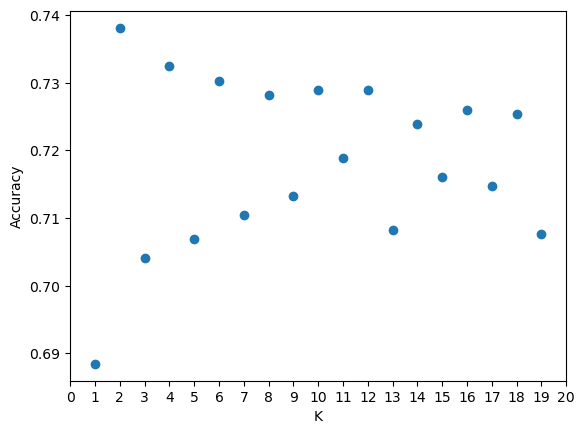

In [56]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='uniform')
    knn.fit(X_train_sm_pt, y_train_sm)
    scores.append(knn.score(X_test_pt, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);

In [58]:
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k,weights='uniform') # declare we're using knn classification model
    model.fit(X_train_sm_pt, y_train_sm) # train model
    y_pred = model.predict(X_test_pt) # predict test
    y_pred_train=model.predict(X_train_sm_pt) # predict train (for sanity checks)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train_sm, y_pred_train),
                                             precision_score(y_train_sm, y_pred_train),
                                             recall_score(y_train_sm, y_pred_train)],
                                   'Test': [accuracy_score(y_test, y_pred),
                                            precision_score(y_test, y_pred),
                                            recall_score(y_test, y_pred)]})
    print(f"Perfomance for K = {k}")
    display(performance_log)

Perfomance for K = 1


,Error_metric,Train,Test
0,Accuracy,0.991673,0.688432
1,Precision,0.993698,0.437113
2,Recall,0.989621,0.560847


Perfomance for K = 2


,Error_metric,Train,Test
0,Accuracy,0.876901,0.738112
1,Precision,0.998722,0.514286
2,Recall,0.754767,0.428571


Perfomance for K = 3


,Error_metric,Train,Test
0,Accuracy,0.862781,0.704045
1,Precision,0.851332,0.461840
2,Recall,0.879073,0.624339


Perfomance for K = 4


,Error_metric,Train,Test
0,Accuracy,0.836350,0.732434
1,Precision,0.888270,0.501272
2,Recall,0.769491,0.521164


Perfomance for K = 5


,Error_metric,Train,Test
0,Accuracy,0.828747,0.706884
1,Precision,0.814550,0.466793
2,Recall,0.851315,0.650794


Perfomance for K = 6


,Error_metric,Train,Test
0,Accuracy,0.817765,0.730305
1,Precision,0.840093,0.497696
2,Recall,0.784938,0.571429


Perfomance for K = 7


,Error_metric,Train,Test
0,Accuracy,0.814506,0.710433
1,Precision,0.796811,0.471591
2,Recall,0.844316,0.658730


Perfomance for K = 8


,Error_metric,Train,Test
0,Accuracy,0.806179,0.728176
1,Precision,0.820733,0.494577
2,Recall,0.783490,0.603175


Perfomance for K = 9


,Error_metric,Train,Test
0,Accuracy,0.800628,0.713272
1,Precision,0.781215,0.475746
2,Recall,0.835144,0.674603


Perfomance for K = 10


,Error_metric,Train,Test
0,Accuracy,0.795679,0.728886
1,Precision,0.798489,0.495851
2,Recall,0.790973,0.632275


Perfomance for K = 11


,Error_metric,Train,Test
0,Accuracy,0.794473,0.718950
1,Precision,0.773053,0.483456
2,Recall,0.833695,0.695767


Perfomance for K = 12


,Error_metric,Train,Test
0,Accuracy,0.795438,0.728886
1,Precision,0.794372,0.496047
2,Recall,0.797248,0.664021


Perfomance for K = 13


,Error_metric,Train,Test
0,Accuracy,0.787594,0.708304
1,Precision,0.766376,0.470054
2,Recall,0.827420,0.685185


Perfomance for K = 14


,Error_metric,Train,Test
0,Accuracy,0.784818,0.723918
1,Precision,0.780685,0.489194
2,Recall,0.792180,0.658730


Perfomance for K = 15


,Error_metric,Train,Test
0,Accuracy,0.782042,0.716111
1,Precision,0.760187,0.480144
2,Recall,0.824041,0.703704


Perfomance for K = 16


,Error_metric,Train,Test
0,Accuracy,0.779628,0.726047
1,Precision,0.774201,0.492188
2,Recall,0.789524,0.666667


Perfomance for K = 17


,Error_metric,Train,Test
0,Accuracy,0.776128,0.714691
1,Precision,0.756043,0.478571
2,Recall,0.815351,0.708995


Perfomance for K = 18


,Error_metric,Train,Test
0,Accuracy,0.775766,0.725337
1,Precision,0.769394,0.491396
2,Recall,0.787594,0.679894


Perfomance for K = 19


,Error_metric,Train,Test
0,Accuracy,0.773473,0.707594
1,Precision,0.753581,0.468978
2,Recall,0.812696,0.679894


## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [62]:
knn_model = model = KNeighborsClassifier(n_neighbors=7,weights='uniform')
model_pipeline = [log_model, knn_model]
model_names = ['Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Logistic Regression': 0.7896699926398855, 'KNN': 0.7749351064852537}
